<a href="https://colab.research.google.com/github/vijaydevverse/data-science-eda-ml-projects/blob/main/DigitalPaymentFraudDetectionEdaV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Digital_Payment_Fraud_Detection_Dataset.csv")

In [ ]:
df

,transaction_id,user_id,transaction_amount,transaction_type,payment_mode,device_type,device_location,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
0,T1,U3756,18758.28,Transfer,UPI,Web,Hyderabad,895,14,1,25535.84,0,0.718,4,0
1,T2,U7899,47538.18,Payment,Wallet,iOS,Hyderabad,918,21,0,3955.85,0,0.525,9,0
2,T3,U1765,36613.10,Payment,Card,Android,Chennai,1506,8,4,22727.71,0,0.985,9,0
3,T4,U8850,29952.99,Payment,Wallet,iOS,Chennai,800,1,3,18095.89,0,0.797,2,0
4,T5,U9049,7843.13,Payment,UPI,Web,Delhi,301,4,1,9317.49,1,0.468,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,T7496,U6242,3962.99,Payment,Card,Web,Delhi,1917,14,0,24820.55,0,0.926,9,0
7496,T7497,U6299,3675.11,Transfer,Card,Web,Hyderabad,329,0,4,6208.20,0,0.036,5,0
7497,T7498,U6605,42523.37,Withdrawal,NetBanking,Android,Chennai,67,19,1,27344.69,0,0.149,6,0
7498,T7499,U5956,10681.86,Withdrawal,UPI,Web,Hyderabad,282,15,2,26586.50,0,0.198,2,0


In [ ]:
df.isnull().sum()

,0
transaction_id,0
user_id,0
transaction_amount,0
transaction_type,0
payment_mode,0
device_type,0
device_location,0
account_age_days,0
transaction_hour,0
previous_failed_attempts,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_id            7500 non-null   object 
 1   user_id                   7500 non-null   object 
 2   transaction_amount        7500 non-null   float64
 3   transaction_type          7500 non-null   object 
 4   payment_mode              7500 non-null   object 
 5   device_type               7500 non-null   object 
 6   device_location           7500 non-null   object 
 7   account_age_days          7500 non-null   int64  
 8   transaction_hour          7500 non-null   int64  
 9   previous_failed_attempts  7500 non-null   int64  
 10  avg_transaction_amount    7500 non-null   float64
 11  is_international          7500 non-null   int64  
 12  ip_risk_score             7500 non-null   float64
 13  login_attempts_last_24h   7500 non-null   int64  
 14  fraud_la

In [ ]:
df.duplicated().sum()

np.int64(0)

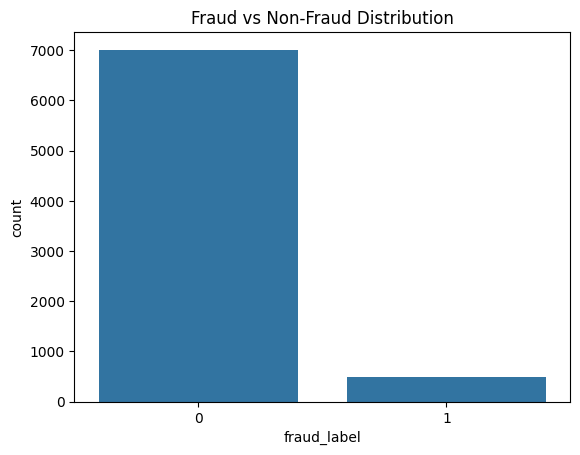

In [ ]:
sns.countplot(x="fraud_label", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

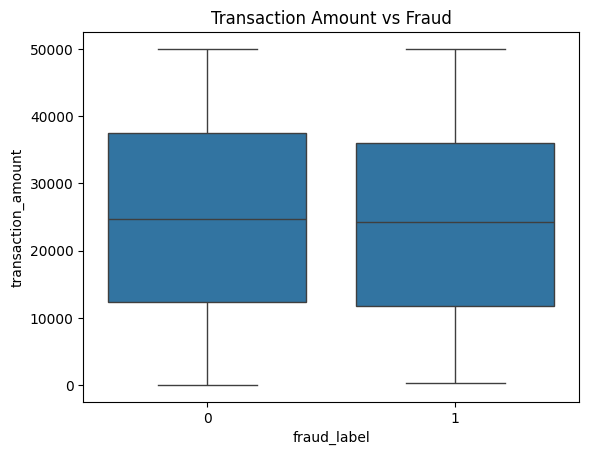

In [ ]:
sns.boxplot(x="fraud_label", y="transaction_amount", data=df)
plt.title("Transaction Amount vs Fraud")
plt.show()

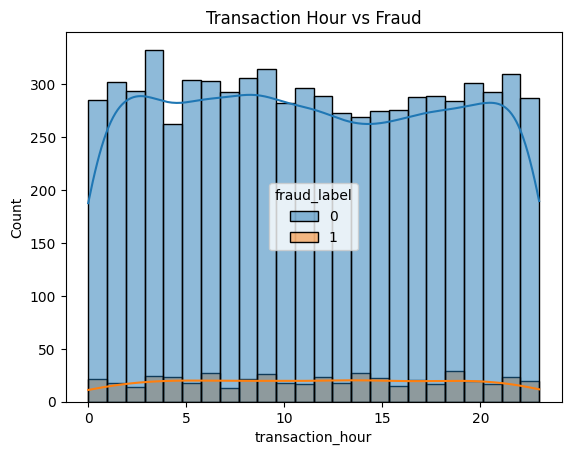

In [ ]:
sns.histplot(data=df,x="transaction_hour",hue="fraud_label",bins=24,kde=True)
plt.title("Transaction Hour vs Fraud")
plt.show()

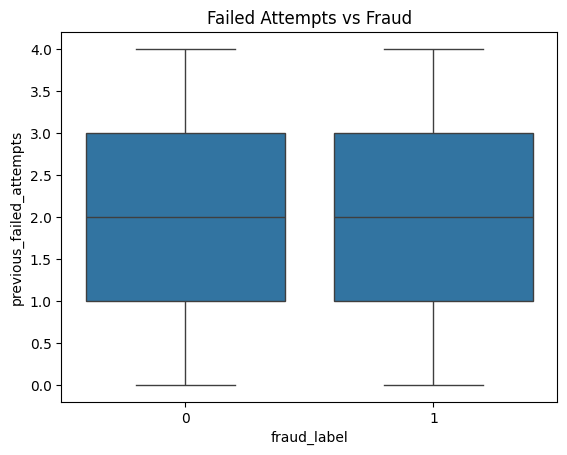

In [ ]:
sns.boxplot(x="fraud_label",y="previous_failed_attempts",data=df)
plt.title("Failed Attempts vs Fraud")
plt.show()

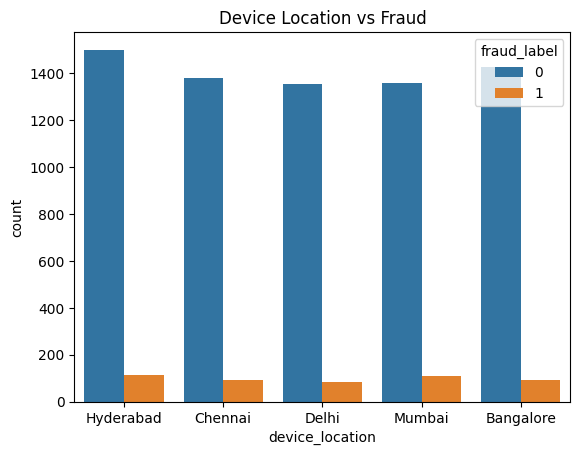

In [ ]:
sns.countplot(x="device_location", hue="fraud_label", data=df)
plt.title("Device Location vs Fraud")
plt.show()

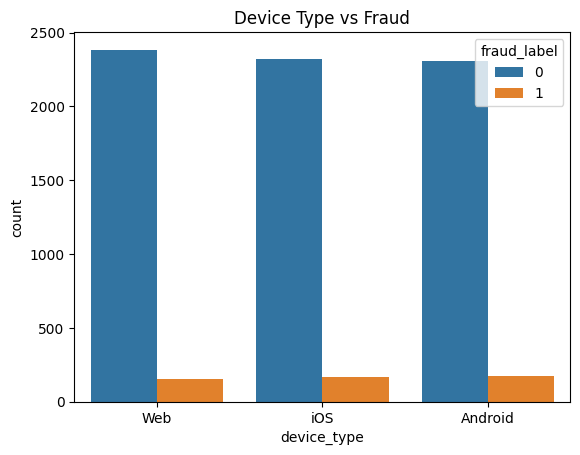

In [ ]:
sns.countplot(x="device_type", hue="fraud_label", data=df)
plt.title("Device Type vs Fraud")
plt.show()

In [ ]:
df.drop(["transaction_id","user_id"],axis=1,inplace=True)

In [ ]:
df

,transaction_amount,transaction_type,payment_mode,device_type,device_location,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
0,18758.28,Transfer,UPI,Web,Hyderabad,895,14,1,25535.84,0,0.718,4,0
1,47538.18,Payment,Wallet,iOS,Hyderabad,918,21,0,3955.85,0,0.525,9,0
2,36613.10,Payment,Card,Android,Chennai,1506,8,4,22727.71,0,0.985,9,0
3,29952.99,Payment,Wallet,iOS,Chennai,800,1,3,18095.89,0,0.797,2,0
4,7843.13,Payment,UPI,Web,Delhi,301,4,1,9317.49,1,0.468,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,3962.99,Payment,Card,Web,Delhi,1917,14,0,24820.55,0,0.926,9,0
7496,3675.11,Transfer,Card,Web,Hyderabad,329,0,4,6208.20,0,0.036,5,0
7497,42523.37,Withdrawal,NetBanking,Android,Chennai,67,19,1,27344.69,0,0.149,6,0
7498,10681.86,Withdrawal,UPI,Web,Hyderabad,282,15,2,26586.50,0,0.198,2,0


In [ ]:
df['device_type'].unique()

array(['Web', 'iOS', 'Android'], dtype=object)

In [ ]:
df["transaction_type"].replace(["Payment", "Transfer", "Withdrawal"],[1, 2, 3],inplace=True)

/tmp/ipython-input-3169504298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["transaction_type"].replace(["Payment", "Transfer", "Withdrawal"],[1, 2, 3],inplace=True)
/tmp/ipython-input-3169504298.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["transaction_type"].replace(["Payment", 

In [ ]:
df["payment_mode"].replace(["UPI", "Wallet", "Card", "NetBanking"],[1, 2, 3, 4],inplace=True)

/tmp/ipython-input-1365886301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["payment_mode"].replace(["UPI", "Wallet", "Card", "NetBanking"],[1, 2, 3, 4],inplace=True)
/tmp/ipython-input-1365886301.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["payment_mode"].replace(["UPI", "Wallet

In [ ]:
df["device_type"].replace(["Web", "Android", "iOS"],[1, 2, 3],inplace=True)

/tmp/ipython-input-3286596543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["device_type"].replace(["Web", "Android", "iOS"],[1, 2, 3],inplace=True)
/tmp/ipython-input-3286596543.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["device_type"].replace(["Web", "Android", "iOS"],[1, 2, 3

In [ ]:
df["device_location"].replace(["Home", "Office", "ATM", "Branch", "Mobile"],[1, 2, 3, 4, 5],inplace=True)

/tmp/ipython-input-2771874416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["device_location"].replace(["Home", "Office", "ATM", "Branch", "Mobile"],[1, 2, 3, 4, 5],inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_amount        7500 non-null   float64
 1   transaction_type          7500 non-null   int64  
 2   payment_mode              7500 non-null   int64  
 3   device_type               7500 non-null   int64  
 4   device_location           7500 non-null   object 
 5   account_age_days          7500 non-null   int64  
 6   transaction_hour          7500 non-null   int64  
 7   previous_failed_attempts  7500 non-null   int64  
 8   avg_transaction_amount    7500 non-null   float64
 9   is_international          7500 non-null   int64  
 10  ip_risk_score             7500 non-null   float64
 11  login_attempts_last_24h   7500 non-null   int64  
 12  fraud_label               7500 non-null   int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 761.8+ KB


In [ ]:
df["device_location"].unique()

array(['Hyderabad', 'Chennai', 'Delhi', 'Mumbai', 'Bangalore'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["device_location"]=le.fit_transform(df["device_location"])

In [ ]:
df

,transaction_amount,transaction_type,payment_mode,device_type,device_location,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
0,18758.28,2,1,1,3,895,14,1,25535.84,0,0.718,4,0
1,47538.18,1,2,3,3,918,21,0,3955.85,0,0.525,9,0
2,36613.10,1,3,2,1,1506,8,4,22727.71,0,0.985,9,0
3,29952.99,1,2,3,1,800,1,3,18095.89,0,0.797,2,0
4,7843.13,1,1,1,2,301,4,1,9317.49,1,0.468,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,3962.99,1,3,1,2,1917,14,0,24820.55,0,0.926,9,0
7496,3675.11,2,3,1,3,329,0,4,6208.20,0,0.036,5,0
7497,42523.37,3,4,2,1,67,19,1,27344.69,0,0.149,6,0
7498,10681.86,3,1,1,3,282,15,2,26586.50,0,0.198,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6745 entries, 0 to 7499
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_amount        6745 non-null   float64
 1   transaction_type          6745 non-null   int64  
 2   payment_mode              6745 non-null   int64  
 3   device_type               6745 non-null   int64  
 4   device_location           6745 non-null   int64  
 5   account_age_days          6745 non-null   int64  
 6   transaction_hour          6745 non-null   int64  
 7   previous_failed_attempts  6745 non-null   int64  
 8   avg_transaction_amount    6745 non-null   float64
 9   is_international          6745 non-null   int64  
 10  ip_risk_score             6745 non-null   float64
 11  login_attempts_last_24h   6745 non-null   int64  
 12  fraud_label               6745 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 995.8 KB


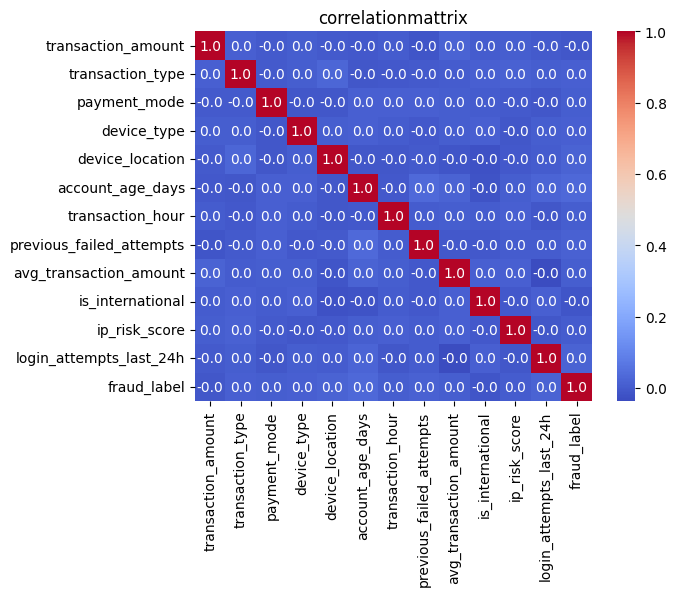

In [ ]:
cm=df.corr()
sns.heatmap(cm,annot=True,fmt="0.1f",cmap="coolwarm")
plt.title("correlationmattrix")
plt.show()

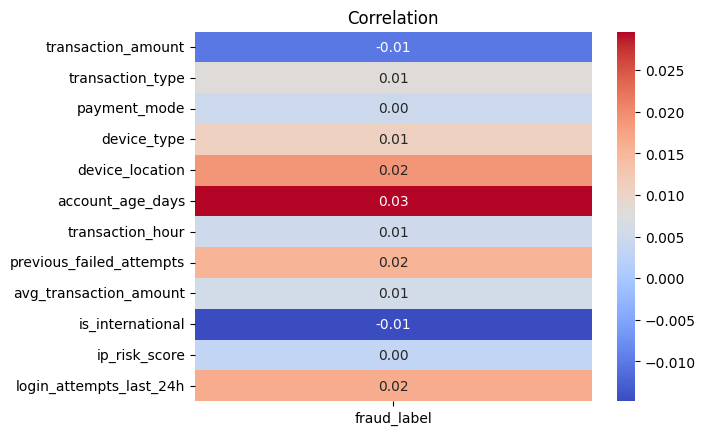

In [ ]:
survived_corr = df.corr()["fraud_label"]
survived_corr = survived_corr.drop('fraud_label')
sns.heatmap(survived_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})
plt.title('Correlation')
plt.show()

<Axes: >

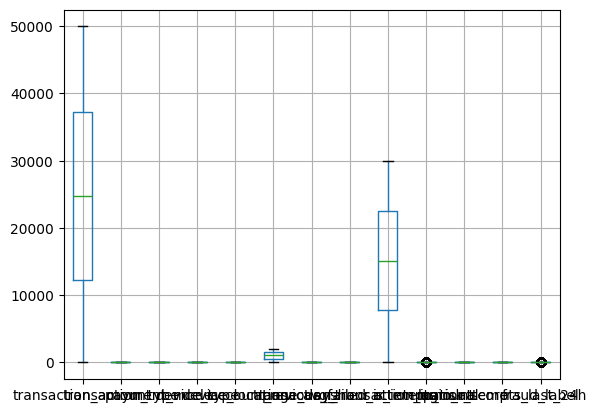

In [ ]:
df.boxplot()

In [ ]:
def remove_outliers_iqr(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
  return df

df_cleaned=remove_outliers_iqr(df,exclude_column='fraud_label')
df=df_cleaned

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6745 entries, 0 to 7499
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_amount        6745 non-null   float64
 1   transaction_type          6745 non-null   int64  
 2   payment_mode              6745 non-null   int64  
 3   device_type               6745 non-null   int64  
 4   device_location           6745 non-null   int64  
 5   account_age_days          6745 non-null   int64  
 6   transaction_hour          6745 non-null   int64  
 7   previous_failed_attempts  6745 non-null   int64  
 8   avg_transaction_amount    6745 non-null   float64
 9   is_international          6745 non-null   int64  
 10  ip_risk_score             6745 non-null   float64
 11  login_attempts_last_24h   6745 non-null   int64  
 12  fraud_label               6745 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 737.7 KB


In [ ]:
df.shape

(6745, 13)

In [ ]:
df

,transaction_amount,transaction_type,payment_mode,device_type,device_location,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
0,18758.28,2,1,1,3,895,14,1,25535.84,0,0.718,4,0
1,47538.18,1,2,3,3,918,21,0,3955.85,0,0.525,9,0
2,36613.10,1,3,2,1,1506,8,4,22727.71,0,0.985,9,0
3,29952.99,1,2,3,1,800,1,3,18095.89,0,0.797,2,0
5,7841.93,2,4,1,3,1992,20,3,4177.23,0,0.583,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,3962.99,1,3,1,2,1917,14,0,24820.55,0,0.926,9,0
7496,3675.11,2,3,1,3,329,0,4,6208.20,0,0.036,5,0
7497,42523.37,3,4,2,1,67,19,1,27344.69,0,0.149,6,0
7498,10681.86,3,1,1,3,282,15,2,26586.50,0,0.198,2,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features=[ "transaction_amount","transaction_type","payment_mode","device_type","device_location","account_age_days","transaction_hour","previous_failed_attempts","avg_transaction_amount","is_international","ip_risk_score","login_attempts_last_24h"]

scaler=MinMaxScaler()

scaled_data=scaler.fit_transform(df[features])

scaled_df=pd.DataFrame(scaled_data,columns=features)

scaled_df["fraud_label"]=df["fraud_label"]

scaled_df.head()

,transaction_amount,transaction_type,payment_mode,device_type,device_location,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
0,0.374699,0.5,0.000000,0.0,0.75,0.444947,0.608696,0.25,0.850846,0.0,0.718,0.375,0.0
1,0.951134,0.0,0.333333,1.0,0.75,0.456511,0.913043,0.00,0.128902,0.0,0.525,1.000,0.0
2,0.732315,0.0,0.666667,0.5,0.25,0.752137,0.347826,1.00,0.756901,0.0,0.985,1.000,0.0
3,0.598919,0.0,0.333333,1.0,0.25,0.397185,0.043478,0.75,0.601947,0.0,0.797,0.125,0.0
4,0.156054,0.5,1.000000,0.0,0.75,0.996481,0.869565,0.75,0.136308,0.0,0.583,0.250,NaN


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

X=df[["transaction_amount","transaction_type","payment_mode","device_type","device_location","account_age_days","transaction_hour","previous_failed_attempts","avg_transaction_amount","is_international","ip_risk_score","login_attempts_last_24h"]]

y=df["fraud_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.93


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
